# <span style="color:gray">Zestimate and Actual Sale Price Difference</span>

 ## <span style="color:black">1. Define</span>   
 Problem -  
 >Predict the log-error between their Zestimate and the actual sale price, given all the features of a home.  
 >  
             log-error=log(Zestimate)−log(SalePrice)  
 > 
 > Predict the logerror for the months in Fall 2017
 
 What we have - 
 >a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.  
 >The train data has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016.  
 >The test data in the public leaderboard has the rest of the transactions between October 15 and December 31, 2016.  
 >4 Categorical/Qualitative - companyId, jobType, degree, major, industry  
 >2 Numeric/Quantitative - yearsExperience, milesFromMetropolis  
 
 Type of Algorithm -  
 >

 ## <span style="color:black">2. Discover</span> 

### <span style="color:black">2.1. Import Libraries</span> 

In [1]:
%%capture
! pip install seaborn
#import initial libraries
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 70)
#pd.set_option('display.width', 100)

In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/Manohar/Documents/DataScience/zillow/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Manohar/Documents/DataScience/zillow/properties_2016.csv
C:/Users/Manohar/Documents/DataScience/zillow/properties_2017.csv
C:/Users/Manohar/Documents/DataScience/zillow/sample_submission.csv
C:/Users/Manohar/Documents/DataScience/zillow/train_2016_v2.csv
C:/Users/Manohar/Documents/DataScience/zillow/train_2017.csv


In [13]:
prop16 = pd.read_csv("C:/Users/Manohar/Documents/DataScience/zillow/properties_2016.csv")
#prop17 = pd.read_csv("C:/Users/Manohar/Documents/DataScience/zillow/properties_2017.csv")
smplsub = pd.read_csv("C:/Users/Manohar/Documents/DataScience/zillow/sample_submission.csv")
train16 = pd.read_csv("C:/Users/Manohar/Documents/DataScience/zillow/train_2016_v2.csv", parse_dates=["transactiondate"])
#train17 = pd.read_csv("C:/Users/Manohar/Documents/DataScience/zillow/train_2017.csv", parse_dates=["transactiondate"])


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
prop16.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [15]:
def num_after_point(x):
    s = str(x)
    if not '.' in s:
        return 0
    return len(s) - s.index('.') - 1

In [16]:
def full_info(df):
    df_column=[]
    df_dtype=[]
    df_null=[]
    df_nullc=[]
    df_mean=[]
    df_median=[]
    df_std=[]
    df_min=[]
    df_max=[]
    df_uniq=[]
    for col in df.columns: 
        df_column.append( col)
        df_dtype.append( df[col].dtype)
        df_null.append( round(100 * df[col].isnull().sum(axis=0)/len(df[col]),2))
        df_nullc.append( df[col].isnull().sum(axis=0))
        df_uniq.append( df[col].nunique()) if df[col].dtype == 'object' else df_uniq.append( NaN)
        df_mean.append(  '{0:.2f}'.format(df[col].mean())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_mean.append( NaN)
        df_median.append( '{0:.2f}'.format(df[col].median())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_median.append( NaN)
        df_std.append( '{0:.2f}'.format(df[col].std())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_std.append( NaN)
        df_max.append( '{0:.2f}'.format(df[col].max())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_max.append( NaN)
        df_min.append( '{0:.2f}'.format(df[col].min())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_min.append( NaN)
    return pd.DataFrame(data = {'ColName': df_column, 'ColType': df_dtype, 'NullCnt': df_nullc, 'NullCntPrcntg': df_null,  'Min': df_min, 'Max': df_max, 'Mean': df_mean, 'Med': df_median, 'Std': df_std, 'UniqCnt': df_uniq})

In [17]:
prop16_Info = full_info(prop16)
prop16_Info.sort_values(by=['NullCnt'], ascending=False, inplace=True, ignore_index=True)
prop16_Info

,ColName,ColType,NullCnt,NullCntPrcntg,Min,Max,Mean,Med,Std,UniqCnt
0,storytypeid,float64,2983593,99.95,7.00,7.00,7.00,7.00,0.00,NaN
1,basementsqft,float64,2983589,99.95,20.00,8516.00,646.88,534.00,538.79,NaN
2,yardbuildingsqft26,float64,2982570,99.91,10.00,6141.00,278.30,168.00,369.73,NaN
3,fireplaceflag,object,2980054,99.83,NaN,NaN,NaN,NaN,NaN,1.0
4,architecturalstyletypeid,float64,2979156,99.80,2.00,27.00,7.20,7.00,2.44,NaN
5,typeconstructiontypeid,float64,2978470,99.77,4.00,13.00,6.00,6.00,0.38,NaN
6,finishedsquarefeet13,float64,2977545,99.74,120.00,2688.00,1178.90,1296.00,357.07,NaN
7,buildingclasstypeid,float64,2972588,99.58,1.00,5.00,3.73,4.00,0.50,NaN
8,decktypeid,float64,2968121,99.43,66.00,66.00,66.00,66.00,0.00,NaN
9,finishedsquarefeet6,float64,2963216,99.26,117.00,952576.00,2414.34,1992.00,7695.30,NaN


In [18]:
train16.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [19]:
full_info(train16)

,ColName,ColType,NullCnt,NullCntPrcntg,Min,Max,Mean,Med,Std,UniqCnt
0,parcelid,int64,0,0.0,10711738.00,162960842.00,12984656.11,12547337.00,2504510.49,NaN
1,logerror,float64,0,0.0,-4.61,4.74,0.01,0.01,0.16,NaN
2,transactiondate,datetime64[ns],0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print('size of properties_2016.csv: ', prop16.shape)
print('size of train_2016_v2.csv: ', train16.shape)
#print('size of properties_2017.csv: ', prop17.shape)
#print('size of train_2017.csv: ', train17.shape)

size of properties_2016.csv:  (2985217, 58)
size of train_2016_v2.csv:  (90275, 3)


In [21]:
unique_props = len(train16['parcelid'].unique())
multiple_sales = len(train16) - unique_props
print('number of unique sales: ', unique_props)
print('Number of duplicate: ', multiple_sales)

number of unique sales:  90150
Number of duplicate:  125


In [22]:
smplsub.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


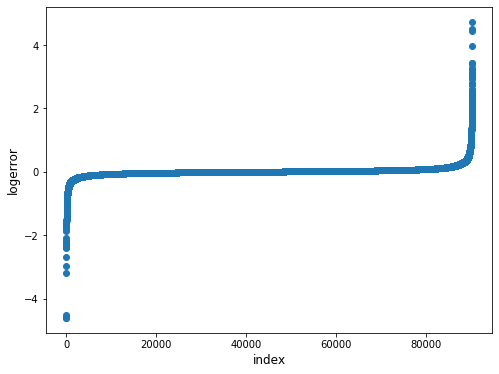

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(range(train16.shape[0]), np.sort(train16.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

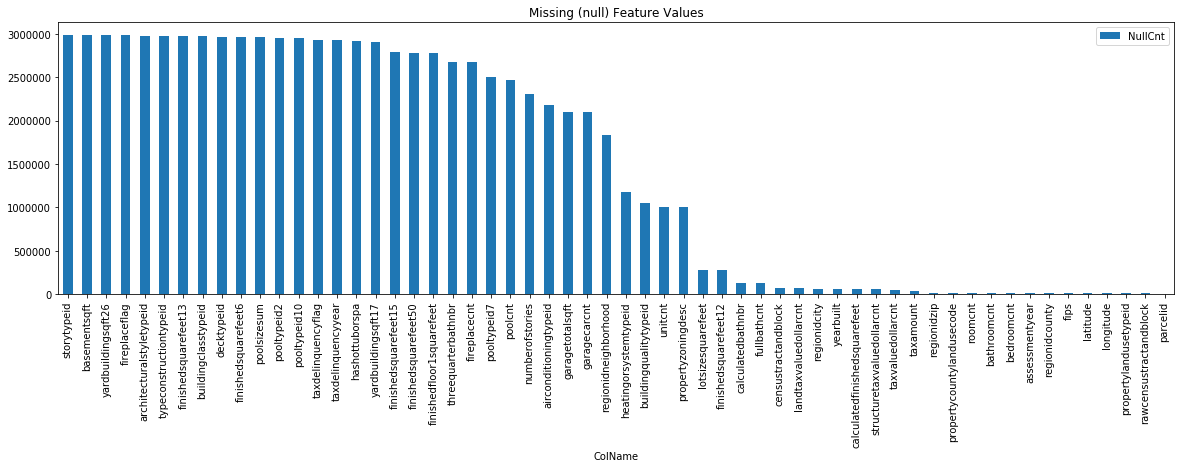

In [25]:
prop16_Info.plot.bar(x = 'ColName', y = 'NullCnt', figsize=(20, 5),rot=90, title='Missing (null) Feature Values')

In [26]:
prop16_trim = prop16.drop(prop16_Info[(prop16_Info.NullCntPrcntg>=90)].ColName.values.tolist(),
                    axis=1)


In [27]:
prop16_trim

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN
1,10759547,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,NaN,0.0,0.0,NaN,NaN,73026.0,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,2.0,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN
3,10859147,NaN,0.0,0.0,7.0,NaN,5068.0,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,1948.0,1.0,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN
4,10879947,NaN,0.0,0.0,NaN,NaN,1776.0,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,1.0,1947.0,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
train16_merge = pd.merge(prop16_trim, train16, on='parcelid', how='left')
train16_merge.head()

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,10754147,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaT
1,10759547,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaT
2,10843547,NaN,0.0,0.0,NaN,NaN,73026.0,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,2.0,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaT
3,10859147,NaN,0.0,0.0,7.0,NaN,5068.0,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,1948.0,1.0,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaT
4,10879947,NaN,0.0,0.0,NaN,NaN,1776.0,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,1.0,1947.0,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaT


In [ ]:
property_data.drop(missing_df[(missing_df.missing_rate>=cutoff)].column_name.values.tolist(),
                    axis=1,inplace=True)

In [29]:
train16_merge.select_dtypes(include=['Object','DateTime']).columns

MemoryError: Unable to allocate 820. MiB for an array with shape (36, 2985342) and data type float64